Rosenbrock Function

tensor(2.)
Iteration: 0
Value is: 4.0
Gradient is: [-4.  0.]
Iteration: 100
Value is: 0.34257397055625916
Gradient is: [-0.64736533 -0.57626796]
Iteration: 200
Value is: 0.07308607548475266
Gradient is: [-0.15889782 -0.25148213]
Iteration: 300
Value is: 0.024583209306001663
Gradient is: [-0.07631198 -0.13664186]
Iteration: 400
Value is: 0.009532516822218895
Gradient is: [-0.04324692 -0.08214474]
Iteration: 500
Value is: 0.003956635948270559
Gradient is: [-0.02639659 -0.05183101]
Iteration: 600
Value is: 0.0017057746881619096
Gradient is: [-0.01676541 -0.03359377]
Iteration: 700
Value is: 0.0007523765088990331
Gradient is: [-0.01090262 -0.02212524]
Iteration: 800
Value is: 0.0003366498276591301
Gradient is: [-0.00719222 -0.01471996]
Iteration: 900
Value is: 0.00015203256043605506
Gradient is: [-0.00479231 -0.00985503]
Iteration: 0
Value is: 4.0
Gradient is: [-4.  0.]
Iteration: 10
Value is: 3.6729893684387207
Gradient is: [-1.9817344  1.0101122]
Iteration: 20
Value is: 3.403010129928589

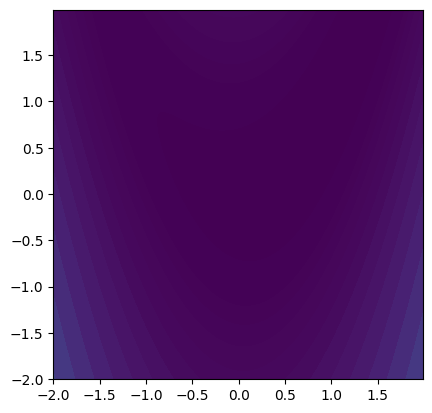

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Tensors and Autograd
z = torch.tensor(0.5, requires_grad=True)
y = z**2 + z
y.backward()
print(z.grad)

# Optimization Examples
a = 1
b = 5

def rosenbrock(x):
    x1, x2 = x[0], x[1]
    return (a - x1)**2 + b * (x2 - x1**2)**2

x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
X1, X2 = np.meshgrid(x1, x2)
X = np.stack([X1, X2], axis=2)
Z = np.apply_along_axis(rosenbrock, 2, X)

plt.contourf(X1, X2, Z, levels=np.logspace(-3, 3, 50), cmap=cm.viridis)
plt.gca().set_aspect('equal', adjustable='box')

# Manual Gradient Descent
num_iterations = 1000
lr = 0.01
x_star = torch.tensor([-1.0, 1.0], requires_grad=True)

for i in range(num_iterations):
    if i % 100 == 0:
        print(f"Iteration: {i}")

    value = rosenbrock(x_star)
    if i % 100 == 0:
        print(f"Value is: {value.item()}")

    value.backward()
    if i % 100 == 0:
        print(f"Gradient is: {x_star.grad.numpy()}")

    with torch.no_grad():
        x_star -= lr * x_star.grad
        x_star.grad.zero_()

# Adam Optimization
x_star = torch.tensor([-1.0, 1.0], requires_grad=True)
optimizer = torch.optim.Adam([x_star], lr=0.01)

for i in range(num_iterations):
    if i % 10 == 0:
        print(f"Iteration: {i}")

    optimizer.zero_grad()
    value = rosenbrock(x_star)
    if i % 10 == 0:
        print(f"Value is: {value.item()}")

    value.backward()
    optimizer.step()
    if i % 10 == 0:
        print(f"Gradient is: {x_star.grad.numpy()}")


OLS

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate training data
d_in, d_out, n = 3, 1, 1000

# Create random data
x = torch.randn((n, d_in))
y = 0.2 * x[:, 0] - 1.3 * x[:, 1] - 0.5 * x[:, 2] + torch.randn((n, 1))

# Define the network
# For simplicity, we're using a single linear layer as the model
model = nn.Sequential(
    nn.Linear(d_in, d_out)
)

# Network parameters
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for t in range(1000):
    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = nn.MSELoss()(y_pred, y)
    if t % 10 == 0:
        print(f"Epoch: {t}, Loss: {loss.item()}")

    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract and compare parameters
# PyTorch model parameters
theta = [p.data.numpy() for p in model.parameters()]

# Compare with linear regression coefficients if needed
# In Python, you would typically use a library like scikit-learn for linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.detach().numpy(), y.detach().numpy())
lm_coef = [reg.intercept_, reg.coef_]

print("Linear Model Coefficients:", lm_coef)
print("NN Model Parameters:", theta)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Loss: 3.6976423263549805
Epoch: 10, Loss: 3.461334705352783
Epoch: 20, Loss: 3.292443037033081
Epoch: 30, Loss: 3.1835176944732666
Epoch: 40, Loss: 3.118494749069214
Epoch: 50, Loss: 3.0818049907684326
Epoch: 60, Loss: 3.0629489421844482
Epoch: 70, Loss: 3.054488182067871
Epoch: 80, Loss: 3.051119565963745
Epoch: 90, Loss: 3.0498874187469482
Epoch: 100, Loss: 3.049490213394165
Epoch: 110, Loss: 3.0493884086608887
Epoch: 120, Loss: 3.049370050430298
Epoch: 130, Loss: 3.0493695735931396
Epoch: 140, Loss: 3.0493695735931396
Epoch: 150, Loss: 3.0493693351745605
Epoch: 160, Loss: 3.049368143081665
Epoch: 170, Loss: 3.049368143081665
Epoch: 180, Loss: 3.049367666244507
Epoch: 190, Loss: 3.0493674278259277
Epoch: 200, Loss: 3.049367666244507
Epoch: 210, Loss: 3.049367666244507
Epoch: 220, Loss: 3.049367904663086
Epoch: 230, Loss: 3.049367904663086
Epoch: 240, Loss: 3.049367904663086
Epoch: 250, Loss: 3.049367666244507
Epoch: 260, Loss: 3.049367666244507
Epoch: 270, Loss: 3.049367904

In [3]:
lm_coef

[array([-7.10849613e-02, -2.62294173e+00, -1.27318668e+00,  2.29711103e+00,
        -9.36358988e-01,  2.33068094e-01, -1.02102257e-01, -1.04828620e+00,
        -4.66608733e-01, -1.42946208e+00, -8.19642961e-01, -3.01834822e+00,
         5.43341875e-01, -2.10591102e+00, -8.16916525e-01, -2.12766558e-01,
        -5.34773290e-01,  1.15383804e+00, -3.74237448e-01, -2.25584626e+00,
         3.82559681e+00,  2.34295297e+00,  4.60475236e-01, -2.39228106e+00,
        -1.31518221e+00,  5.19330129e-02,  2.91211724e+00,  1.32967639e+00,
         2.24699402e+00,  1.52335000e+00, -1.57255614e+00, -3.65089834e-01,
         1.04031777e+00, -8.41489062e-02, -5.20719867e-03,  8.24277163e-01,
         5.67711413e-01,  9.08732772e-01, -3.00888968e+00, -1.32358706e+00,
         1.01480174e+00,  8.60871494e-01,  2.93373990e+00,  1.44188449e-01,
        -8.00371826e-01, -9.46298361e-01, -4.44235921e-01, -5.41102111e-01,
         1.11456788e+00,  4.26966906e-01, -5.65503776e-01, -7.71765947e-01,
         8.1

In [5]:
lm_coef

[array([ 1.27215135e+00,  3.97077084e-01, -1.80068314e-01,  3.15873563e-01,
        -1.49770164e+00,  3.97918522e-01, -2.19924045e+00,  3.21774423e-01,
        -1.25800169e+00, -3.93772554e+00,  2.04754782e+00,  1.02382457e+00,
        -1.70668578e+00, -3.08993496e-02, -1.49419034e+00, -1.86187732e+00,
         9.20297563e-01, -7.14042485e-01,  5.50735652e-01,  8.68317366e-01,
         4.85095054e-01,  3.18004578e-01,  2.96137184e-01, -1.44169307e+00,
        -2.89091766e-01,  8.08378533e-02, -2.55815476e-01, -4.31847763e+00,
        -5.44075727e-01, -7.23781526e-01, -1.23415232e+00, -7.05365062e-01,
        -3.58815074e-01, -1.20959544e+00,  8.75028223e-02,  9.84904170e-01,
         3.63788694e-01, -2.82316542e+00, -3.89326119e+00, -1.16259634e+00,
        -4.29398566e-01,  1.00661099e+00, -1.20088422e+00,  1.60360193e+00,
         3.22071075e-01,  2.39463997e+00, -1.71631825e+00,  1.72435236e+00,
        -2.38399291e+00,  5.86829305e-01, -1.91612875e+00, -1.42609799e+00,
        -8.6